In [104]:
# Project Description

#I chose the **Phishing Website Dataset** from Kaggle because it is directly relevant to cybersecurity — an increasingly important field that affects everyone. This dataset contains features extracted from real websites and aims to classify whether a given website is legitimate or a phishing attempt.

#This project is interesting because it shows how various small attributes (like the presence of an IP address, abnormal URLs, or HTTPS usage) can reveal malicious intent. Analyzing these features can help improve digital safety and deepen understanding of online threats.


In [105]:
# ## 2️⃣ System Stage – Phishing Website Dataset

# - **File name:** phishing.csv  
# - **File size:** Approximately a few MB  
# - **File type:** CSV (Comma-Separated Values)  
# - **Source:** Kaggle - Phishing Website Detector  
# - **Protocol:** Downloaded via HTTPS  
# - **Versioning:**  
#   - Only one file provided; no formal versions  
#   - Project version control is managed via Git  


In [106]:
# ## 3️⃣ Metadata

# - **Data Types:**  
#   All features are binary (0 or 1), with the target column named `class`:  
#   - `1` = legitimate website  
#   - `-1` = phishing website  

# - **Missing Values:**  
#   No missing values were found in this dataset. All rows are complete and usable for modeling.

# - **Special Values:**  
#   No special placeholder values (like “unknown” or -999) were found. The data is clean and well-formatted for direct use in machine learning.

# ---

# ### Feature Explanation for Phishing Website Dataset

# | Feature Name        | Description                                                                                   |
# |---------------------|-----------------------------------------------------------------------------------------------|
# | **Index**           | A unique identifier or serial number for each sample (not used in modeling).                   |
# | **UsingIP**         | Whether the website URL uses an IP address instead of a domain name (1 = yes, -1 = no).        |
# | **LongURL**         | Whether the URL is unusually long (1 = yes, -1 = no).                                         |
# | **ShortURL**        | Whether the URL is suspiciously short (1 = yes, -1 = no).                                     |
# | **Symbol@**         | Presence of '@' symbol in URL (1 = yes, -1 = no).                                             |
# | **Redirecting//**   | Whether the URL contains '//' after the protocol part (1 = yes, -1 = no).                      |
# | **PrefixSuffix-**   | Use of hyphen '-' in the domain name (1 = yes, -1 = no).                                      |
# | **SubDomains**      | Number of subdomains (1 = more subdomains than usual, -1 = normal).                            |
# | **HTTPS**           | Whether the website uses HTTPS protocol (1 = yes, -1 = no).                                   |
# | **DomainRegLen**    | Length of domain registration (1 = short registration period, -1 = long).                      |
# | **Favicon**         | Whether the favicon is loaded from the same domain (1 = yes, -1 = no).                        |
# | **NonStdPort**      | Use of non-standard port in URL (1 = yes, -1 = no).                                           |
# | **HTTPSDomainURL**  | Whether HTTPS is present in the domain name part of the URL (1 = yes, -1 = no).               |
# | **RequestURL**      | Whether resources are loaded from an external domain (1 = yes, -1 = no).                      |
# | **AnchorURL**       | Whether anchor tags link to external domains (1 = yes, -1 = no).                             |
# | **LinksInScriptTags** | Presence of links inside script tags (1 = yes, -1 = no).                                    |
# | **ServerFormHandler** | Whether the form handler is on an external server (1 = yes, -1 = no).                       |
# | **InfoEmail**       | Whether the website contains email information (1 = yes, -1 = no).                           |
# | **AbnormalURL**     | Whether the URL has abnormalities (1 = yes, -1 = no).                                        |
# | **WebsiteForwarding** | Whether the website forwards to another URL (1 = yes, -1 = no).                            |
# | **StatusBarCust**   | Whether the status bar is customized (1 = yes, -1 = no).                                     |
# | **DisableRightClick** | Whether right-click is disabled (1 = yes, -1 = no).                                        |
# | **UsingPopupWindow** | Presence of popup windows (1 = yes, -1 = no).                                               |
# | **IframeRedirection** | Use of iframes for redirection (1 = yes, -1 = no).                                          |
# | **AgeofDomain**     | Domain age (1 = young domain, -1 = old).                                                     |
# | **DNSRecording**    | Whether the domain is recorded in DNS (1 = yes, -1 = no).                                   |
# | **WebsiteTraffic**  | Website traffic rank (1 = low traffic, -1 = high).                                          |
# | **PageRank**        | Page rank of the website (1 = low, -1 = high).                                              |
# | **GoogleIndex**     | Whether the website is indexed by Google (1 = no, -1 = yes).                                |
# | **LinksPointingToPage** | Number of links pointing to the page (1 = few, -1 = many).                              |
# | **StatsReport**     | Whether there are statistical reports about the site (1 = no, -1 = yes).                    |
# | **class**           | Target variable: `1` = legitimate website, `-1` = phishing website.                         |



In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
df = pd.read_csv("phishing.csv")
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [109]:
df.nunique()


Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

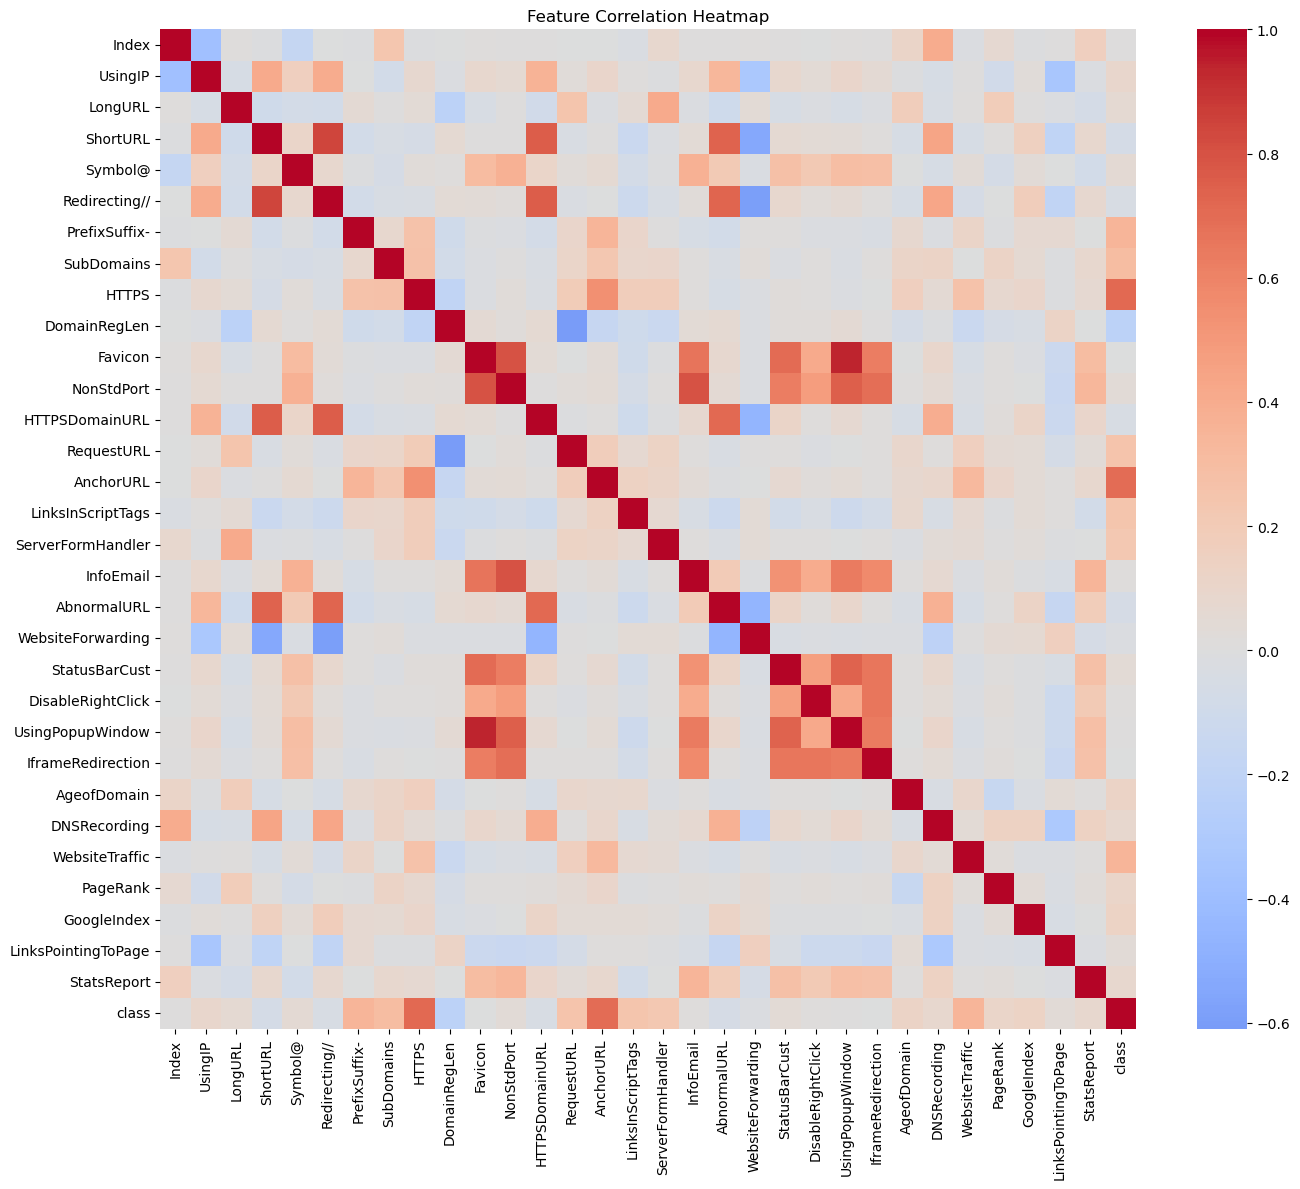

In [110]:
# Compute correlation matrix on the current DataFrame (excluding non-numeric columns if any)
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [111]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [112]:
for col in X.columns:
    unique_vals = X[col].nunique()
    print(f"Feature '{col}' has {unique_vals} unique values.")

Feature 'UsingIP' has 2 unique values.
Feature 'LongURL' has 3 unique values.
Feature 'ShortURL' has 2 unique values.
Feature 'Symbol@' has 2 unique values.
Feature 'Redirecting//' has 2 unique values.
Feature 'PrefixSuffix-' has 2 unique values.
Feature 'SubDomains' has 3 unique values.
Feature 'HTTPS' has 3 unique values.
Feature 'DomainRegLen' has 2 unique values.
Feature 'Favicon' has 2 unique values.
Feature 'HTTPSDomainURL' has 2 unique values.
Feature 'RequestURL' has 2 unique values.
Feature 'AnchorURL' has 3 unique values.
Feature 'LinksInScriptTags' has 3 unique values.
Feature 'ServerFormHandler' has 3 unique values.
Feature 'AbnormalURL' has 2 unique values.
Feature 'UsingPopupWindow' has 2 unique values.
Feature 'DNSRecording' has 2 unique values.
Feature 'WebsiteTraffic' has 3 unique values.
Feature 'PageRank' has 2 unique values.
Feature 'GoogleIndex' has 2 unique values.
Feature 'LinksPointingToPage' has 3 unique values.


In [113]:
# we can see that favicon and using popupwindow are highly correlated, so we can drop one of them.
# PCA wont work well here because alot of the features arent correlated. 

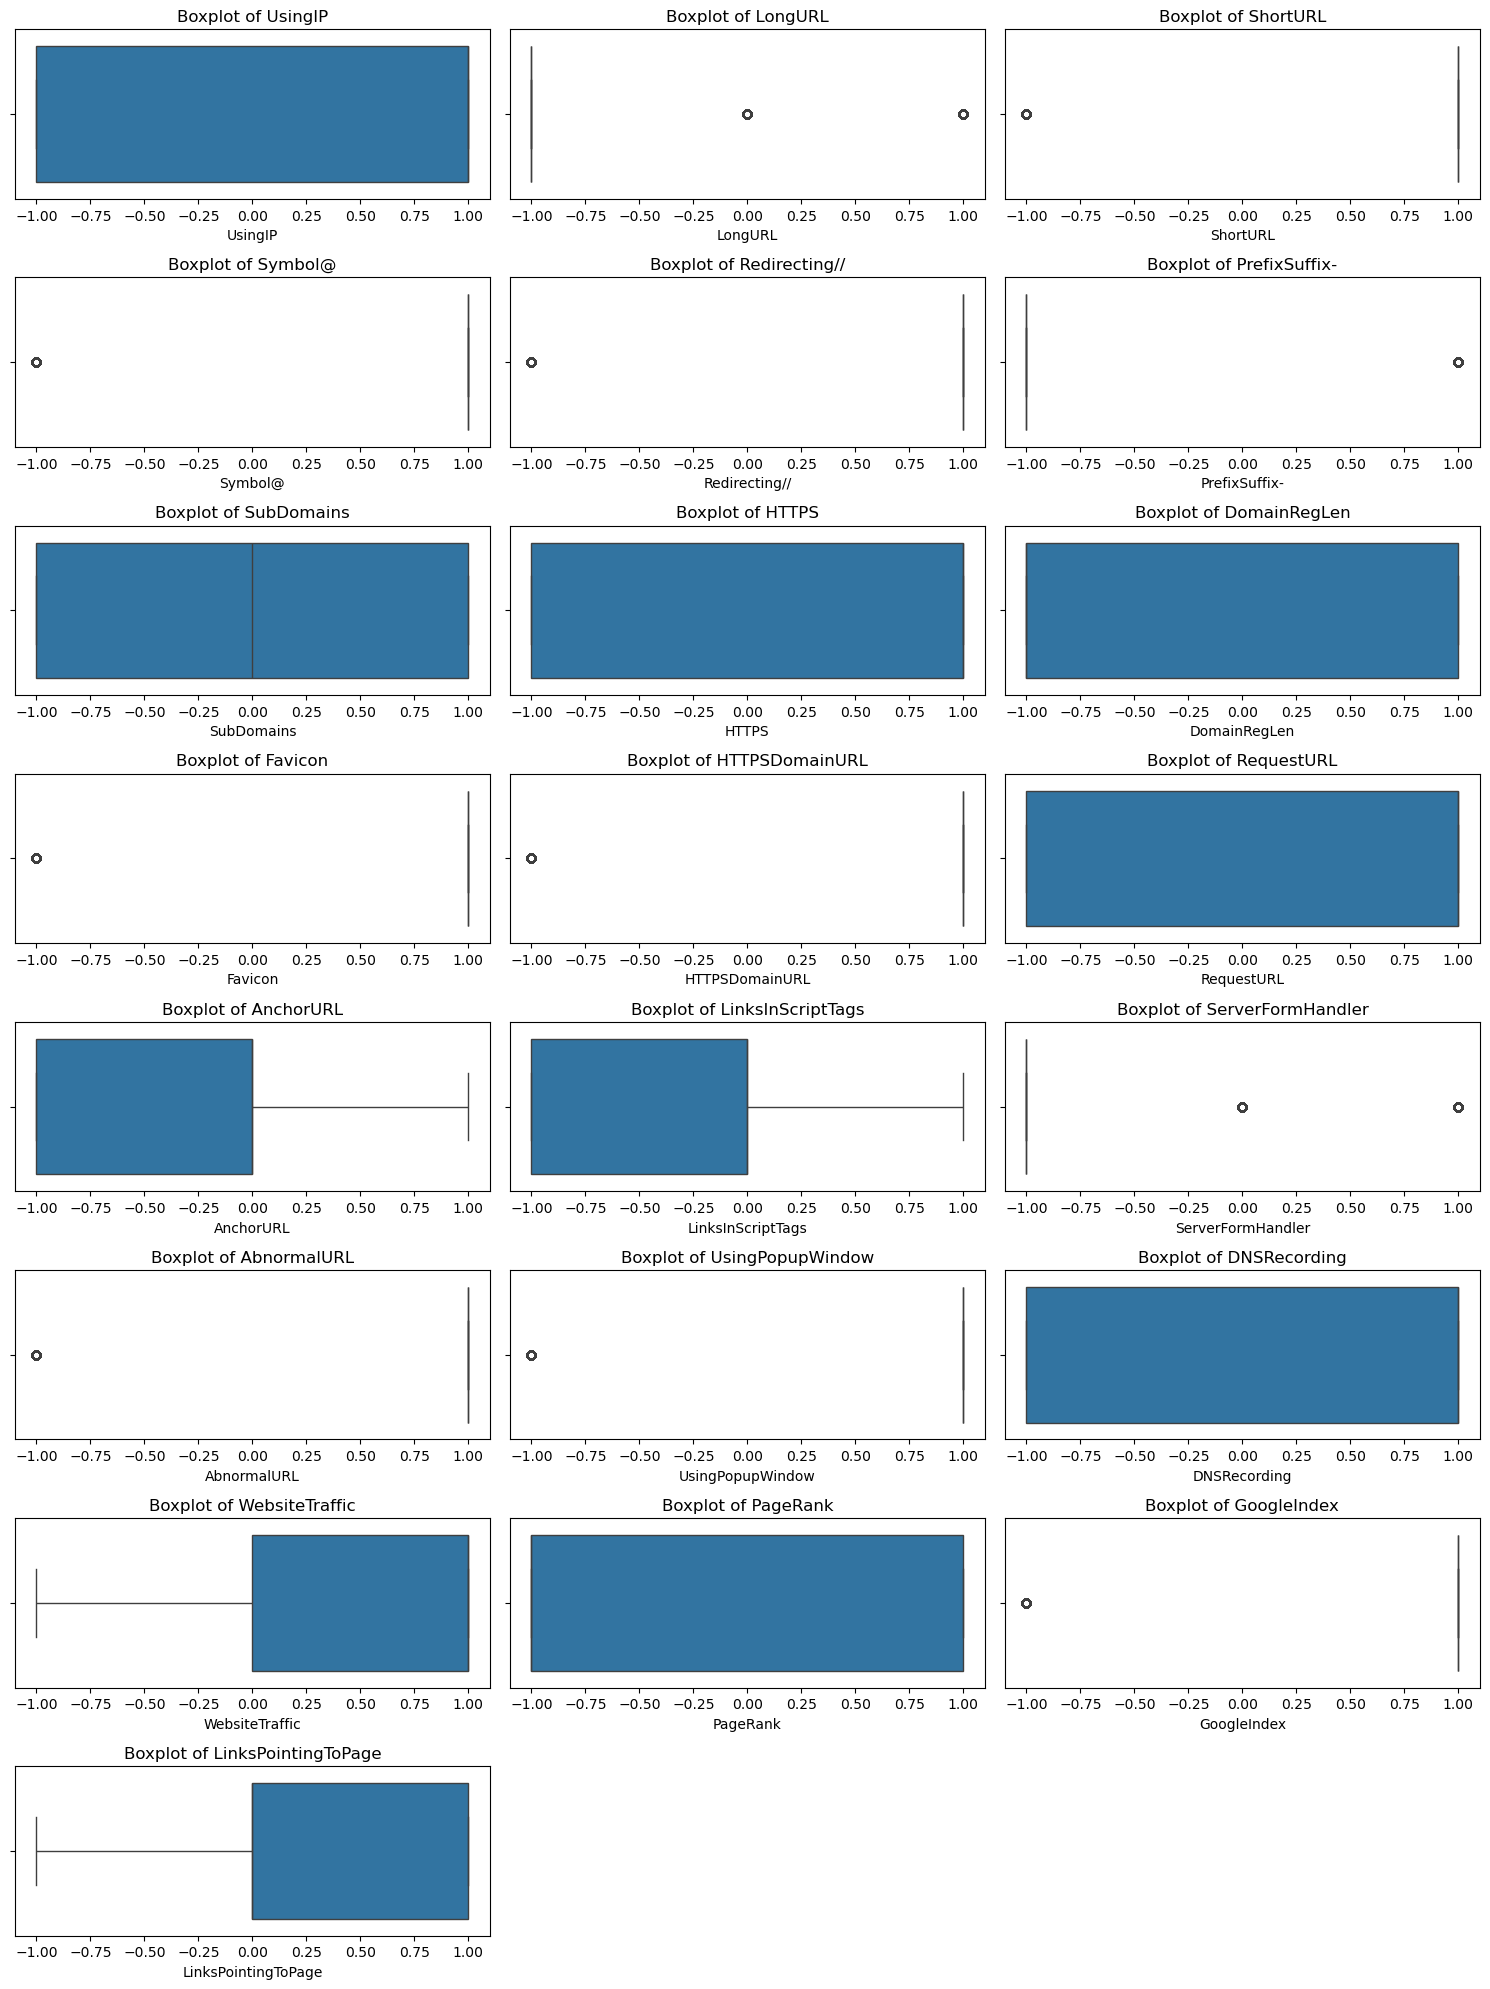

{-1: 855, 1: 7988}


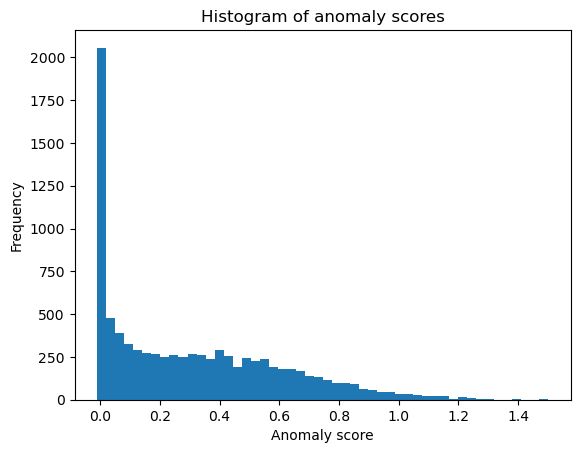

In [114]:
## Outlier Analysis

### 1. Outliers in Individual Features

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
for i, col in enumerate(X.columns, 1):
    plt.subplot(len(X.columns)//3 + 1, 3, i)
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 2. Anomaly Detection with One-Class SVM
from sklearn import svm
import numpy as np

# Assuming X_train_scaled is your scaled training data with normal samples
# If you don't have a separate normal dataset, use the training set as normal
clf = svm.OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)
clf.fit(X_train_scaled)

# Predict anomalies (-1 means anomaly, +1 means normal)
y_pred = clf.predict(X_train_scaled)

# Count predicted anomalies and normal points
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

# Optional: visualize anomaly scores histogram
import matplotlib.pyplot as plt

scores = clf.decision_function(X_train_scaled)  # The lower, the more abnormal
plt.hist(scores, bins=50)
plt.title('Histogram of anomaly scores')
plt.xlabel('Anomaly score')
plt.ylabel('Frequency')
plt.show()


{-1: 443, 1: 8400}


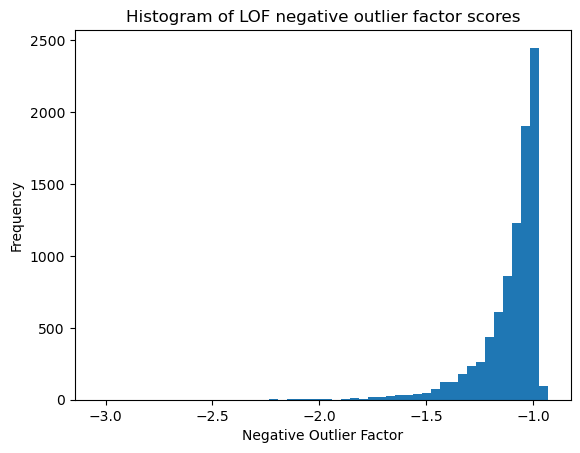

In [115]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Create LOF model
# Note: LOF doesn't have a fit_predict split; it fits and predicts in one call
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # contamination = expected outlier fraction

# Fit and predict on the training data
y_pred = lof.fit_predict(X_train_scaled)  # +1 = inlier, -1 = outlier

# Count the inliers and outliers
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

# LOF negative outlier factor (lower means more abnormal)
scores = lof.negative_outlier_factor_

# Visualize anomaly scores histogram
plt.hist(scores, bins=50)
plt.title('Histogram of LOF negative outlier factor scores')
plt.xlabel('Negative Outlier Factor')
plt.ylabel('Frequency')
plt.show()

In [116]:
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination=0.05)
clf.fit(X_train_scaled)
y_pred = clf.predict(X_train_scaled)  # -1 anomaly, 1 normal
print("Elliptic Envelope results:", dict(zip(*np.unique(y_pred, return_counts=True))))
 # wont work   on this dataset, as it assumes Gaussian distribution of features

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-207.407413703808459 > -1155.741691617051174). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-346.686175262298775 > -1153.361055735345417). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-385.207989933758881 > -1013.754344618150071). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
c

Elliptic Envelope results: {-1: 443, 1: 8400}


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-96.062115556066757 > -913.886117344146896). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-202.612764709959606 > -1130.384708531226124). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-392.333095585705223 > -1285.574521627193008). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(
c:\

In [ ]:
features_to_remove = [
    'Index',               # Just a row ID
    'AgeofDomain',         # May be missing or unreliable
    'DisableRightClick',   # Many legitimate sites also disable right-click
    'IframeRedirection',   # Used on both phishing and legit sites
    'StatusBarCust',       # Many legit sites customize the status bar
    'StatsReport',         # May contain outdated or irrelevant stats
    'NonStdPort',          # Rarely used and may not be useful
    'WebsiteForwarding',   # Unreliable for classification
    'InfoEmail',   # Just the presence of email, weak signal   
    'Favicon'     #correlated with usingpopupwindow
    'UsingPopupWindow'  # Many legitimate sites use popups for various reasons..
]

# Separate target first before dropping
y = df['class']

# Drop only columns that exist and exclude 'class' from dropping here
cols_to_drop = [col for col in features_to_remove if col in df.columns]
X = df.drop(columns=cols_to_drop + ['class'])  # drop unwanted features and the target column
X.columns


Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 'LinksInScriptTags',
       'ServerFormHandler', 'AbnormalURL', 'UsingPopupWindow', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage'],
      dtype='object')

In [118]:
# Optional: remove outliers using Isolation Forest (contamination=0.01)
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)
outlier_flags = iso.fit_predict(X)
mask_inliers = outlier_flags == 1

X, y = X.loc[mask_inliers], y.loc[mask_inliers]  # Use .loc for label-based filtering



In [119]:
import numpy as np

# Define the k parameter for Chebyshev's inequality (e.g., k=3 for 3 standard deviations)
k = 3

# Calculate mean and std for each feature
means = X.mean()
stds = X.std()

# Compute the boolean mask for each feature where values are within k std deviations
mask = ((X - means).abs() <= k * stds).all(axis=1)

# Filter X and y to keep only inliers
X_filtered = X.loc[mask]
y_filtered = y.loc[mask]

print(f"Removed {len(X) - len(X_filtered)} outliers based on Chebyshev inequality with k={k}")

# Now X_filtered and y_filtered contain your data without those outliers
 

Removed 0 outliers based on Chebyshev inequality with k=3


In [120]:
from scipy.stats import zscore

z_scores = X.apply(zscore)
outliers = (np.abs(z_scores) > 3).sum()
print("Outliers per column:\n", outliers)


Outliers per column:
 UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
AbnormalURL            0
UsingPopupWindow       0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
dtype: int64


In [121]:
# # Outlier Detection using Chebyshev's Inequality

# After applying outlier detection using Chebyshev's inequality with a threshold of *k* standard deviations, **no data points were removed**. 

# This indicates that the dataset does not contain extreme outliers, and all observations fall within the expected range based on their feature distributions. 

# Therefore, the dataset can be considered **clean with respect to extreme values**.


In [122]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
clf = svm.OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)
clf.fit(X_train)

# Predict on training data and outliers
y_pred_train = clf.predict(X_train)
y_pred_outliers = clf.predict(X_outliers)

print(f"Predictions on training data: {np.bincount(y_pred_train + 1)}")  # +1 to shift {-1,1} to {0,2}
print(f"Predictions on outliers: {np.bincount(y_pred_outliers + 1)}")

# Plot the results
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("One-Class SVM for Anomaly Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)

plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolors='k', label="Normal Data")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', edgecolors='k', label="Anomalies")

plt.legend()
plt.show()

NameError: name 'X_outliers' is not defined

In [ ]:
X.dtypes

In [ ]:
print("Dataset shape:", X.shape)
X.info()

In [ ]:
X.describe()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print class distribution
print("\nClass distribution:")
print(y.value_counts())

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution: Legitimate (1) vs Phishing (-1)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer

# Count missing values before imputation
missing_before = X.isnull().sum()

# Impute missing values (returns NumPy array)
imputer = SimpleImputer(strategy='median')
X_imputed_array = imputer.fit_transform(X)

# Convert back to DataFrame with original column names
X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns)

# Count missing values after imputation
missing_after = X_imputed.isnull().sum()

# Plot missing values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=missing_before.index, y=missing_before.values, color='skyblue')
plt.title("Missing Values Before Imputation")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=missing_after.index, y=missing_after.values, color='lightgreen')
plt.title("Missing Values After Imputation")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

for col in binary_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


In [ ]:
# Calculate proportion of 1s for each feature in X
feature_summary = (X == 1).sum() / len(X)

# Plot feature presence rate
plt.figure(figsize=(12, 6))
feature_summary.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Presence Rate (Proportion of 1s per Feature)')
plt.ylabel('Proportion of 1s')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create X and y from your DataFrame
X = df.drop("class", axis=1)
y = df["class"]

# Train-test split (IMPORTANT: reset this)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm shapes match
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

In [ ]:

# === Train Random Forest model ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# === Evaluate on test set ===
y_pred_test = rf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Overall model accuracy: {test_accuracy:.4f}")

# === Feature Importances from Random Forest ===
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

# === Plot Feature Importances ===
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='forestgreen')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop('class', axis=1)
y = df['class']

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

mi_series.plot(kind='bar', title="Mutual Information with Target", figsize=(12,6))
plt.ylabel("MI Score")
plt.show()


In [ ]:
# Feature Importance Plot
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
features = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Random Forest Feature Importances')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Step 1: Reduce dimensions to 2D for visualization (optional) ===
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# === Step 2: Apply KMeans with 2 clusters (assuming phishing vs legit) ===
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# === Step 3: Plot the clusters in 2D PCA space ===
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette='Set1', s=40)
plt.title("KMeans Clustering (2 Clusters) on Phishing Dataset (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# === Step 4: Check alignment with real labels ===
cluster_df = pd.DataFrame({'True_Label': y.values, 'Cluster': cluster_labels})
ct = pd.crosstab(cluster_df['True_Label'], cluster_df['Cluster'], rownames=['Actual'], colnames=['Cluster'])
display(ct)

# === Step 5: Silhouette Score (to check how well the clustering fits the data) ===
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")


In [ ]:
# ## Clustering Analysis Using KMeans

# As part of this project, I applied **KMeans clustering** with two clusters on the phishing website dataset to explore whether phishing and legitimate websites naturally form distinct groups without using the labels.

# To visualize the clusters, I first reduced the dataset to two dimensions using **PCA (Principal Component Analysis)**. Then, I applied KMeans and plotted the resulting clusters in the PCA space.

# ### Cluster Interpretation and Alignment

# I compared the cluster assignments against the true labels using a confusion matrix to assess how well the clustering corresponds to actual phishing and legitimate website classes.

# ### Silhouette Score

# To evaluate clustering quality, I computed the **Silhouette Score**, which ranges from -1 to 1:

# - A score near **1** indicates well-separated clusters.
# - A score near **0** indicates overlapping clusters.
# - A score near **-1** indicates incorrect clustering.

# The silhouette score I obtained was **0.1126**, which suggests that the clusters are only weakly separated and there is considerable overlap between phishing and legitimate samples in the feature space.

# ---

# ### Summary

# - The low silhouette score indicates that while some grouping exists, phishing and legitimate websites are not strongly separable using unsupervised clustering alone.
# - This supports the need for supervised learning models to achieve better classification performance.
# - Further feature engineering or exploring other clustering methods may improve unsupervised separation in future work.


In [ ]:
# the features in this data set are binary , we NLP is not applicable here.

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# === Custom SVM Class ===
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # ensure labels are -1 or 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

# === Main Execution ===
if __name__ == "__main__":
    # Ensure y values are numeric and X is scaled if needed
    from sklearn.preprocessing import StandardScaler

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Optional scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the custom SVM
    svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=2000)
    svm.fit(X_train_scaled, y_train)

    # === Evaluation on Train Set ===
    y_pred_train = svm.predict(X_train_scaled)
    print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Train F1 Score:", f1_score(y_train, y_pred_train, average='weighted', labels=[-1, 1]))
    print("Train Recall:", recall_score(y_train, y_pred_train, average='weighted', labels=[-1, 1]))
    print("\nTrain Classification Report:\n", classification_report(y_train, y_pred_train))

    # === Evaluation on Test Set ===
    y_pred_test = svm.predict(X_test_scaled)
    print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Test F1 Score:", f1_score(y_test, y_pred_test, average='weighted', labels=[-1, 1]))
    print("Test Recall:", recall_score(y_test, y_pred_test, average='weighted', labels=[-1, 1]))
    print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

def deep_error_analysis(model, X_test, y_test, model_name="Model"):
    print(f"\n🔍 {model_name} Error Analysis")
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Basic metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[-1, 1])
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Phishing (-1)', 'Legit (1)'],
                yticklabels=['Phishing (-1)', 'Legit (1)'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} – Confusion Matrix")
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, y_scores)
        fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=1)
        
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{model_name} – ROC Curve")
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("⚠️ No probability estimates available for ROC curve.")
    
    # Misclassifications
    errors = (y_test != y_pred).sum()
    print(f"❌ Total Misclassified Samples: {errors} out of {len(y_test)}")
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)


In [ ]:
# Random Forest
deep_error_analysis(rf, X_test_scaled, y_test, model_name="Random Forest")

# KNN
deep_error_analysis(knn, X_test_scaled, y_test, model_name="K-Nearest Neighbors (KNN)")

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
deep_error_analysis(log_model, X_test, y_test, model_name="Logistic Regression")

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
deep_error_analysis(nb_model, X_test, y_test, model_name="Naive Bayes")


In [ ]:
# # ✅ Final Conclusion and Model Comparison

# In this project, I evaluated four models on the **Phishing Website Dataset**:

# - **Random Forest**  
# - **Logistic Regression**  
# - **K-Nearest Neighbors (KNN)**  
# - **Naive Bayes**

# ---

# ## 📊 Model Performance Summary

# | Model              | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
# |-------------------|----------|-----------|--------|----------|---------|
# | Random Forest      | **96.11%** | **96.29%** | **96.76%** | **96.53%** | **~0.990+** |
# | Logistic Regression| 93.17%   | 93–94%    | 90–95% | 93–94%   | 0.980   |
# | KNN                | 93.85%   | 94.35%    | 94.66% | 94.50%   | ~0.97   |
# | Naive Bayes        | 88.47%   | 82–95%    | 84–94% | 88–89%   | 0.968   |

# ---

# ## 🏆 Best Performing Model: Random Forest

# The **Random Forest** classifier outperformed all other models across key metrics. It demonstrated excellent generalization, strong predictive power, and support for interpretability using feature importance.

# ---

# ## 🔍 Individual Model Evaluation, Goodness of Fit, and Explainability

# ### 1. Random Forest ✅
# - **Fit to Data**:  
#   Best performance overall. Balanced precision and recall, high F1-score and ROC-AUC.
# - **Explainability**:  
#   Supports feature importance and SHAP/LIME analysis.
# - **Recommendations**:  
#   Use `GridSearchCV` for hyperparameter tuning and remove redundant features to improve efficiency.

# ---

# ### 2. Logistic Regression 🧠
# - **Fit to Data**:  
#   Strong performance with ~93% accuracy and 0.98 ROC-AUC. However, convergence warnings suggest scaling or increasing `max_iter` may improve results.
# - **Explainability**:  
#   High — due to simple, interpretable linear coefficients.
# - **Recommendations**:  
#   Scale data, increase iterations, and explore feature interactions for enhanced performance.

# ---

# ### 3. K-Nearest Neighbors (KNN) 🔄
# - **Fit to Data**:  
#   Very good metrics but susceptible to scaling and irrelevant features.
# - **Explainability**:  
#   Intuitive (based on nearest neighbors).
# - **Recommendations**:  
#   Normalize features and use PCA or feature selection to reduce noise.

# ---

# ### 4. Naive Bayes 📉
# - **Fit to Data**:  
#   Lower accuracy due to strong independence assumptions. Good as a baseline model.
# - **Explainability**:  
#   High, based on feature likelihoods.
# - **Recommendations**:  
#   Try `BernoulliNB` if features are binary. Perform feature selection for better results.

# ---

# ## 🔧 General Recommendations

# - **Cross-Validation**:  
#   Use stratified k-fold CV to assess stability and prevent overfitting.

# - **Feature Engineering**:  
#   Remove redundant or noisy features and explore mutual information.

# - **Error Analysis**:  
#   Review false positives and negatives for insights into misclassifications.

# - **Model Interpretability**:  
#   Use SHAP or LIME with Random Forest to understand individual predictions.

# - **Model Updating**:  
#   Re-train regularly to keep up with changing phishing techniques.

# ---

# ## 🏁 Final Verdict

# **Random Forest** is the most effective model for phishing website detection due to its high accuracy, flexibility, and support for interpretability. For deployment, focus on this model with regular retraining, feature refinement, and explainability integration.
